In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
train_path = r'C:\Users\Jims\Desktop\Python\jimslochifung\Project\gesture_detection\gesture\train'
test_path = r'C:\Users\Jims\Desktop\Python\jimslochifung\Project\gesture_detection\gesture\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(64, 64), class_mode='categorical', batch_size=11, shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(64, 64), class_mode='categorical', batch_size=11, shuffle=True)

imgs, labels = next(train_batches)

Found 6621 images belonging to 11 classes.
Found 330 images belonging to 11 classes.


In [47]:
# Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 11, figsize=(30, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

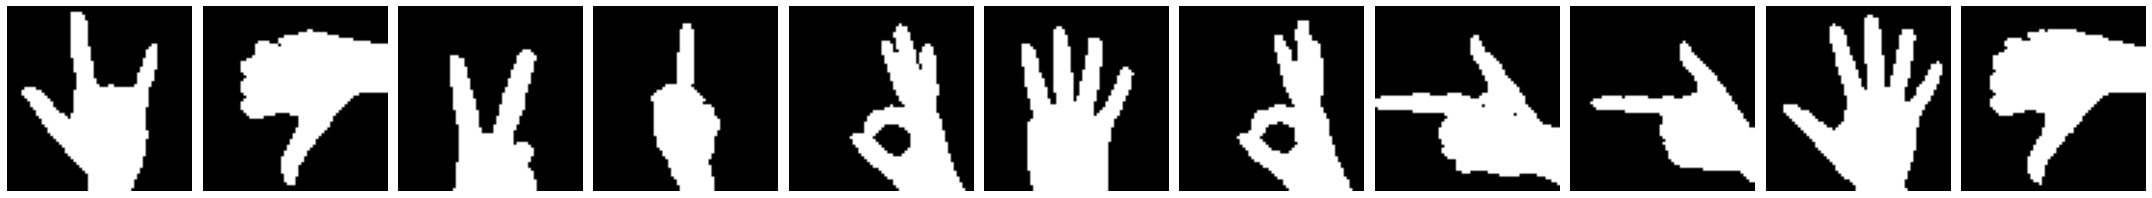

(11, 64, 64, 3)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [48]:
plotImages(imgs)
print(imgs.shape)
print(labels)

In [50]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.3))
model.add(Dense(11, activation="softmax"))


In [ ]:
# In[23]:


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [51]:
model.compile(optimizer=SGD(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [52]:
history2 = model.fit(train_batches, epochs=11, callbacks=[
                     reduce_lr, early_stop],  validation_data=test_batches)  # , checkpoint])
imgs, labels = next(train_batches)  # For getting next batch of imgs...

imgs, labels = next(test_batches)  # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(
    f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/11
602/602 [==============================] - 18s 29ms/step - loss: 0.2590 - accuracy: 0.9662 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/11
602/602 [==============================] - 16s 27ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/11
602/602 [==============================] - 18s 30ms/step - loss: 7.1699e-04 - accuracy: 1.0000 - val_loss: 6.0060e-04 - val_accuracy: 1.0000
Epoch 4/11
602/602 [==============================] - 18s 30ms/step - loss: 4.7664e-04 - accuracy: 1.0000 - val_loss: 4.2481e-04 - val_accuracy: 1.0000
Epoch 5/11
602/602 [==============================] - 21s 34ms/step - loss: 3.5152e-04 - accuracy: 1.0000 - val_loss: 3.2790e-04 - val_accuracy: 1.0000
Epoch 6/11
602/602 [==============================] - 20s 33ms/step - loss: 2.9212e-04 - accuracy: 1.0000 - val_loss: 2.9432e-04 - val_accuracy: 1.0000
Epoch 7/11
602/602 [==============================] - 20s 33ms/step - loss: 2.6253e-04 - accuracy: 1.000

In [84]:
model.save('best_model_dataflair3.h5')

print(history2.history)

{'loss': [0.259018212556839, 0.0013835683930665255, 0.0007169903838075697, 0.0004766371566802263, 0.0003515153657644987, 0.0002921165432780981, 0.00026252862880937755, 0.0002382877137279138, 0.00021788637968711555, 0.0002006896393140778, 0.00018576584989205003], 'accuracy': [0.966168224811554, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.0023774064611643553, 0.001000547083094716, 0.000600599218159914, 0.00042480940464884043, 0.00032789635588414967, 0.0002943231083918363, 0.00026401065406389534, 0.0002404354454483837, 0.00021963946346659213, 0.00020382142974995077, 0.0001894758315756917], 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]}


In [85]:
imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_dataflair3.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(
    f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 0.0001651327038416639; accuracy of 100.0%


In [80]:
model.summary()

scores  # [loss, accuracy] on test data...
model.metrics_names

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)             

['loss', 'accuracy']

In [94]:
word_dict = {0: 'OK', 1: 'bunny', 2: 'down', 3: 'five', 4: 'four',
             5: 'left', 6: 'One', 7: 'right', 8: 'three', 9: 'two', 10: 'up'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
print(predictions.max(1))

predictions on a small set of test data--

bunny   [0.9998504  0.99961793 0.99999905 0.9999974  0.99995446 0.9999291
 0.9997341  0.9996481  0.9995492  0.999926   0.99997807]
right   [0.9998504  0.99961793 0.99999905 0.9999974  0.99995446 0.9999291
 0.9997341  0.9996481  0.9995492  0.999926   0.99997807]
down   [0.9998504  0.99961793 0.99999905 0.9999974  0.99995446 0.9999291
 0.9997341  0.9996481  0.9995492  0.999926   0.99997807]
down   [0.9998504  0.99961793 0.99999905 0.9999974  0.99995446 0.9999291
 0.9997341  0.9996481  0.9995492  0.999926   0.99997807]
four   [0.9998504  0.99961793 0.99999905 0.9999974  0.99995446 0.9999291
 0.9997341  0.9996481  0.9995492  0.999926   0.99997807]
right   [0.9998504  0.99961793 0.99999905 0.9999974  0.99995446 0.9999291
 0.9997341  0.9996481  0.9995492  0.999926   0.99997807]
two   [0.9998504  0.99961793 0.99999905 0.9999974  0.99995446 0.9999291
 0.9997341  0.9996481  0.9995492  0.999926   0.99997807]
left   [0.9998504  0.99961793 0.99999905 0.99

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

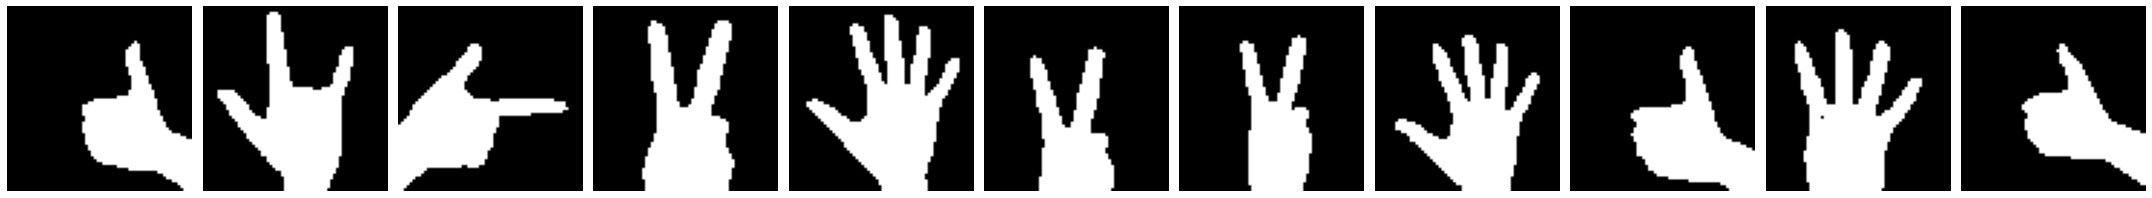

In [82]:
plotImages(imgs)

In [83]:
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)
history2.history

Actual labels
up   bunny   right   two   five   two   two   five   up   four   up   (11, 64, 64, 3)


{'loss': [0.259018212556839,
  0.0013835683930665255,
  0.0007169903838075697,
  0.0004766371566802263,
  0.0003515153657644987,
  0.0002921165432780981,
  0.00026252862880937755,
  0.0002382877137279138,
  0.00021788637968711555,
  0.0002006896393140778,
  0.00018576584989205003],
 'accuracy': [0.966168224811554,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0023774064611643553,
  0.001000547083094716,
  0.000600599218159914,
  0.00042480940464884043,
  0.00032789635588414967,
  0.0002943231083918363,
  0.00026401065406389534,
  0.0002404354454483837,
  0.00021963946346659213,
  0.00020382142974995077,
  0.0001894758315756917],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005]}